In this notebook, we will use ASTrED in full-auto mode. That means that tokenisation, parsing, and word alignment all
 happen automatically. This is easy, but slow and likely less accurate than manual annotation. I would especially
 encourage you to use manual word alignments. But in this example, we show that you _can_ do it all automatically,
 which may be useful for large parallel corpus studies.

In [1]:
from astred import AlignedSentences, Sentence

By default, the library assumes that the text that you provide is pretokenised and that words are separated by spaces.
 If that is not the case, we need to set `is_tokenised` to `False`.

In the cell below, you'll notice that we do not provide any word alignment information to the `AlignedSentences`
 constructor. What is actually happening, is that - if no word alignments are provided -, an automatic aligner is
 instantiated which aligns the given source and target tokens. To do that we rely on a fork of AwesomeAlign
 (see the README), which is a multilingual, neural aligner.

In [2]:
sent_en = Sentence.from_text("Yesterday, I ate some cookies.", "en", is_tokenized=False)
sent_nl = Sentence.from_text("Ik at gisteren wat koekjes.", "nl", is_tokenized=False)

aligned = AlignedSentences(sent_en, sent_nl)

As you can see below, these alignments are good - but not great. All alignments are correct, but the alignment between
"Yesterday" and "gisteren" is missing. The tokenizer did a perfect job, however!

In [3]:
print(aligned.src.text)
print(aligned.tgt.text)
print(aligned.giza_word_aligns)

Yesterday , I ate some cookies .
Ik at gisteren wat koekjes .
2-0 3-1 4-3 5-4 6-5


We can also display the dependency trees to have a look at how well the automatic parser did. `stanza`
 (the parser) did a perfect job. The difference between `obl` for "Yesterday" and `advmod` for "gisteren" is open
 for discussion: `obl` is used for noun (phrases) and `advmod` for adverbs. Even on a theoretical level you can debate
 whether "yesterday" and "gisteren" are nouns or adverbs, but I'll leave that up to the theorists.

Note how the trees display both the text and the dependency relation? You can specify whichever attribute of a `Word`
 that you want to (e.g. `upos`, `id`, `head` and so on) to `attrs` and it will be included in the tree.

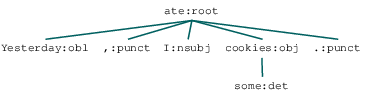

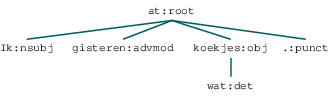

In [4]:
from nltk.tree import Tree as NltkTree
from IPython.display import display

display(NltkTree.fromstring(sent_en.tree.to_string(attrs=["text", "deprel"])))
display(NltkTree.fromstring(sent_nl.tree.to_string(attrs=["text", "deprel"])))

## Different alignment models

As a default, the aligner will make use of the pretrained model `bert-base-multilingual-cased`. This will be downloaded
 automatically behind the scenes. However, you may choose to train/finetune your own model, or download
 [pre-existing ones](https://github.com/neulab/awesome-align#model-performance), and use that instead. If that is the
 case, you can instantiate an aligner from-scratch and pass that to the `AlignedSentences` constructor, too! This way,
 the provided aligner will be used instead of the default one that uses `bert-base-multilingual-cased`.

In [7]:
from astred import Aligner

# kwargs can contain some options specific to Awesome Aligner. Most important is probably the use of a GPU. By default
# a GPU will be used if it is available.
kwargs = {"no_cuda": True}
# Provide directory that contains the pytorch_model.bin and other files
aligner = Aligner(r"C:\path\to\your\custom\model", **kwargs)

sent_en = Sentence.from_text("Yesterday, I ate some cookies.", "en", is_tokenized=False)
sent_nl = Sentence.from_text("Ik at gisteren wat koekjes.", "nl", is_tokenized=False)

aligned = AlignedSentences(sent_en, sent_nl, aligner=aligner)

OSError: Model name 'C:\path\to\your\custom\model' was not found in tokenizers model name list (bert-base-uncased, bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased, bert-base-multilingual-cased, bert-base-chinese, bert-base-german-cased, bert-large-uncased-whole-word-masking, bert-large-cased-whole-word-masking, bert-large-uncased-whole-word-masking-finetuned-squad, bert-large-cased-whole-word-masking-finetuned-squad, bert-base-cased-finetuned-mrpc, bert-base-german-dbmdz-cased, bert-base-german-dbmdz-uncased, bert-base-finnish-cased-v1, bert-base-finnish-uncased-v1, bert-base-dutch-cased). We assumed 'C:\path\to\your\custom\model' was a path, a model identifier, or url to a directory containing vocabulary files named ['vocab.txt'] but couldn't find such vocabulary files at this path or url.